# **Ex1 - Unsupervised learning**

## Names and IDs

1.   208564682
2.   316128529

**Introduction**

In this assignment, we will focus on the practical application of unsupervised learning methods, specifically K-means clustering and Principal Component Analysis (PCA). The primary objective is to deepen your understanding of these algorithms and develop proficiency in their implementation using Python and relevant libraries.

**Learning Objectives:**
1.   **Load Local Files**: Implement techniques for
     loading datasets from a local file system into Python.
3.   **Data Visualization**: Apply various visualization techniques to interpret and present your data analysis findings effectively.
4.   **Use Scikit-learn for K-means Clustering**: Use the Scikit-learn library to apply the K-means clustering algorithm.
5.   **Implement Scikit-learn PCA**: Utilize PCA from Scikit-learn to perform dimensionality reduction, a critical technique for analyzing high-dimensional data.
6.   **Algoritmic Understendig**: Solve the calculation problem whle using the algorithms learned in class.








**Important Guidelines:**

**Thoroughly Read the Task Before Implementation:** Ensure to understand the entire assignment and its requirements before beginning to code. A comprehensive understanding will aid in a more structured and efficient approach to the tasks.

**Code Reusability and Function Writing:** Focus on writing reusable code and functions. This practice is crucial for maintaining an organized, efficient, and easily debuggable codebase.





















This assignment is designed to enhance both your theoretical understanding and practical skills in key areas of machine learning. Approach each task with diligence and attention to detail.

## Import All Packages
Add all imports needed for this notebook to run

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA
import seaborn as sns

## 1. Visualization (15 points)
In this section, your task is to create and analyze **three** insightful visualizations based on the customer segmentation dataset. The purpose of these visualizations is to uncover underlying patterns and trends in the data that can inform strategic decisions. Your ability to interpret these visualizations will be key in understanding customer behaviors and preferences.

*   You will get 4 points for the graph and 1 for the insight.



In [9]:
# load the data
df = pd.read_csv('/content/customer_segmentation.csv')
df = df.dropna()


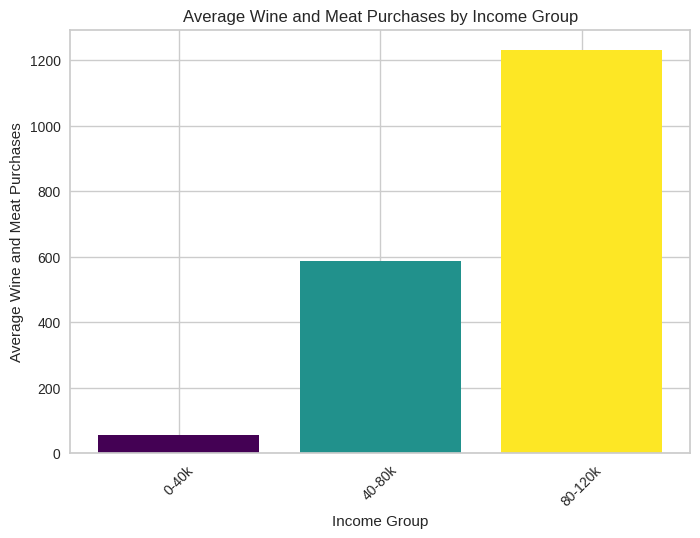

In [10]:
# Graph 1 -
# Wine and Meat Expenditure Calculation
WineAndMeat = df['MntWines'] + df['MntMeatProducts']
# Define Income Bins and Labels
income_bins = [0, 40000, 80000, 120000]
income_labels = ['0-40k', '40-80k', '80-120k']
# Categorize Income into Groups
IncomeGroup = pd.cut(df['Income'], bins=income_bins, labels=income_labels)
# Create a DataFrame with WineAndMeat and IncomeGroup
combined_df = pd.DataFrame({'WineAndMeat': WineAndMeat, 'IncomeGroup': IncomeGroup})
# Calculate Average Wine and Meat Purchases for each Income Group
average_combined_category = combined_df.groupby('IncomeGroup')['WineAndMeat'].mean().reset_index()
# Define Colors for the Bar Chart
num_colors = len(average_combined_category)
colors = plt.cm.viridis(np.linspace(0, 1, num_colors))
# Generate Bar Chart
plt.bar(average_combined_category['IncomeGroup'], average_combined_category['WineAndMeat'], color=colors)
plt.title('Average Wine and Meat Purchases by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Average Wine and Meat Purchases')
plt.xticks(rotation=45)
plt.show()


**Insight** -  There is a positive correlation between income groups and the average combined purchases of wine and meat products.This suggests that individuals with higher incomes are likely to spend more on these categories.

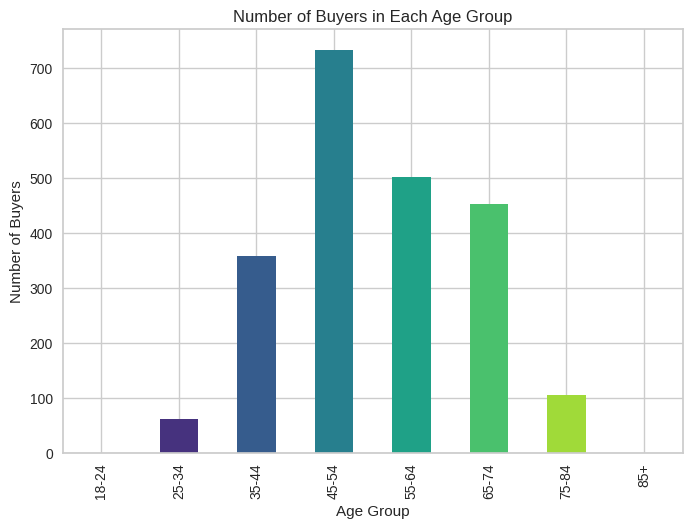

In [11]:
# Graph 2 -
# Calculate Age based on Birth Year
current_year = pd.to_datetime('today').year
Age = current_year - df['Year_Birth']
# Define Age Bins and Labels
age_bins = [18, 25, 35, 45, 55, 65, 75, 85, 100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+']
# Categorize Age into Groups
AgeGroup = pd.cut(Age, bins=age_bins, labels=age_labels, right=False)
# Count the Number of Buyers in Each Age Group
age_group_counts = AgeGroup.value_counts().sort_index()
# Define Colors for the Bar Chart
colors = plt.cm.viridis(np.linspace(0, 1, len(age_group_counts)))
# Generate Bar Chart
age_group_counts.plot(kind='bar', color=colors)
plt.title('Number of Buyers in Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Buyers')

plt.show()

**Insight** -The number of buyers aged 35-74 is significantly larger than in other age groups. This indicates that the company may be less accessible to older individuals (74 and older) and also less attractive to young people for various reasons.

<ipython-input-12-28ceee7e1a6f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Education', y='Response', data=response_rate_sorted, palette='Set2')


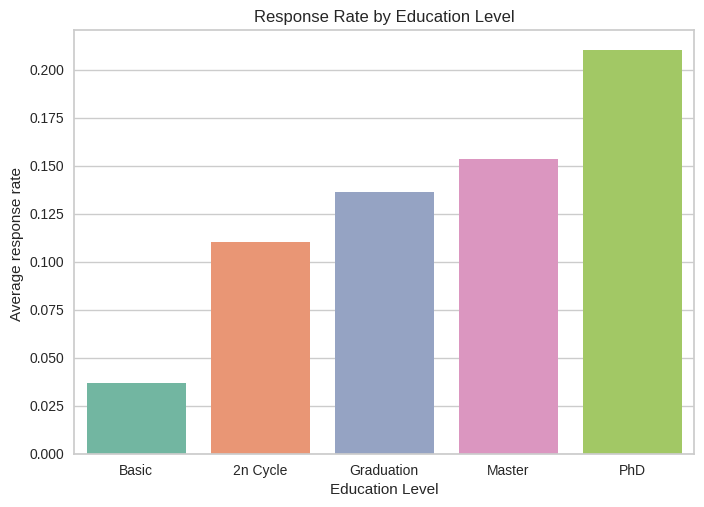

In [12]:
# Graph 3, -
# Calculate Response Rate by Education Level
response_rate = df.groupby('Education')['Response'].mean().reset_index()
# Sort Education Levels by Response Rate
response_rate_sorted = response_rate.sort_values(by='Response')
# Generate Bar Chart using Seaborn
sns.barplot(x='Education', y='Response', data=response_rate_sorted, palette='Set2')

# Set Chart Title and Labels
plt.title('Response Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average response rate ')
plt.show()



**Insight** -The bar graph indicates a positive correlation between higher education levels and a greater average response to marketing campaigns, suggesting that individuals with higher education are more likely to respond . This implies that the marketing campaigns are structured to appeal more to a target audience with higher education and are not adequately adapted for an audience with lower education levels.


## 2. KMEANS (35 points)

In this exercise, you will implement K-means clustering on a comprehensive customer dataset, to identify distinct customer segments.

*   Load the data again.
*   Scale the data using minmax scaler (2 points).
*   Encode categorical variables (3 points).
*   Apply k-Means algorithm on the 'MntMeatProducts' and 'MntWines' features using n_clusters=5
 (10 points).
*   Visualize the clusters (5 points).
*   Apply k-Means algorithm on all features and find the best k using 2 methods (10 points).
*   Visualize the methods (5 points).










In [13]:
# load the data
df2 = pd.read_csv('/content/customer_segmentation.csv') # Load Customer Segmentation Data from CSV File

#Preprocessing
# Drop Rows with Missing Values
df2 = df2.dropna()
# Convert 'Dt_Customer' to datetime
df2['Dt_Customer'] = pd.to_datetime(df2['Dt_Customer'])
# Find the earliest date
earliest_date = df2['Dt_Customer'].min()
# Calculate the Number of Days Since the Earliest Date for Each Entry
df2['Dt_Customer'] = (df2['Dt_Customer'] - earliest_date).dt.days
# Drop the 'ID' Column
df2 = df2.drop('ID', axis=1)

<ipython-input-13-7ba9718ff729>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df2['Dt_Customer'] = pd.to_datetime(df2['Dt_Customer'])


In [14]:
# Scale the data using MinMaxScaler

# Define Numeric Columns to be Scaled
numeric_columns = [
     'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue','Dt_Customer','Year_Birth'
]
# Initialize MinMaxScaler
scaler = MinMaxScaler()
# Scale the Numeric Columns
df2[numeric_columns] = scaler.fit_transform(df2[numeric_columns])

# Encode categorical variables

# Encode 'Married' Variable based on 'Marital_Status'
df2['Married'] = np.where((df2['Marital_Status'] == 'Married') , 1, 0)
# Drop the 'Marital_Status' Column
df2 = df2.drop('Marital_Status', axis=1)
# One-Hot Encode 'Education' Column
df2 = pd.get_dummies(df2, columns=['Education'], prefix='', prefix_sep='')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


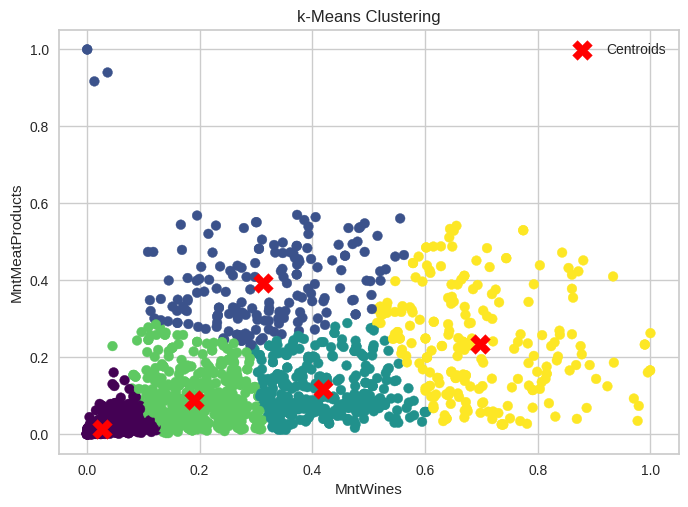

In [15]:
# Apply k-Means on the 'MntWines' and 'MntMeatProducts' features with n_clusters=5
#This function performs k-Means clustering on the specified features, visualizes the resulting clusters, and displays the cluster centroids.

k=5
X = df2[['MntWines','MntMeatProducts']]
kmeans = KMeans(n_clusters=k, random_state=42).fit(X)

# Visualize the clusters
plt.scatter(X['MntWines'], X['MntMeatProducts'], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,  1],marker='X', s=200, c='red', label='Centroids')
plt.title('k-Means Clustering')
plt.ylabel('MntMeatProducts')
plt.xlabel('MntWines')
plt.legend()
plt.grid(True)
plt.show()


### Elbow

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

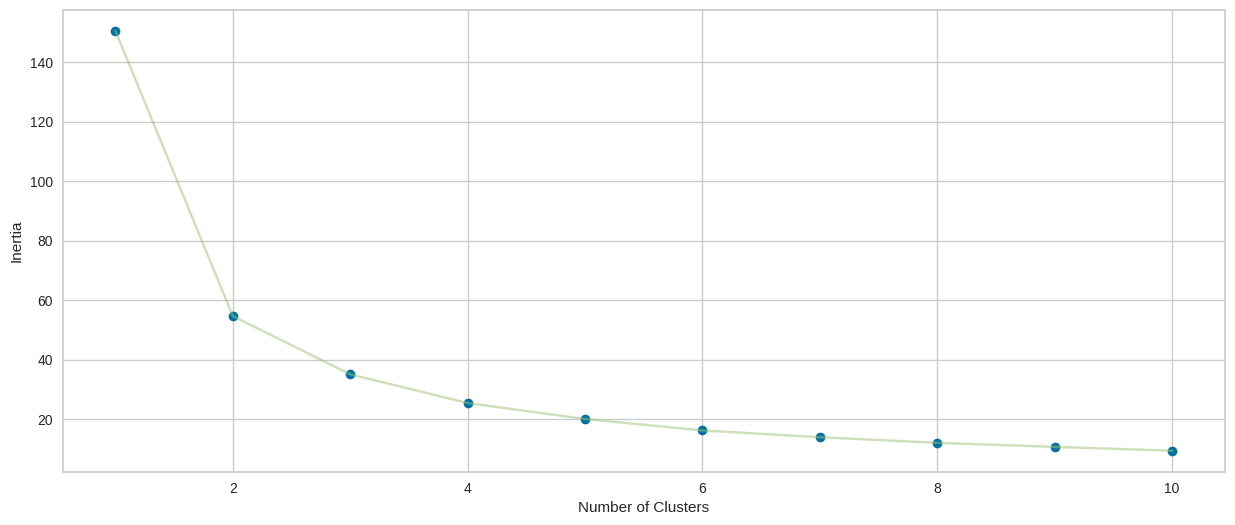

Optimal number of clusters (k) based on the plot: 2


In [16]:
#This function calculates the inertia (within-cluster sum of squares) for different values of k, plots the results, and prints the optimal k based on the elbow method.

# Calculate and visualize the inertia for different values of k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the inertia values for each number of clusters
plt.figure(1, figsize = (15,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

# Print the best k according to the plot
print("Optimal number of clusters (k) based on the plot: 2")


### Silhouette Score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to s

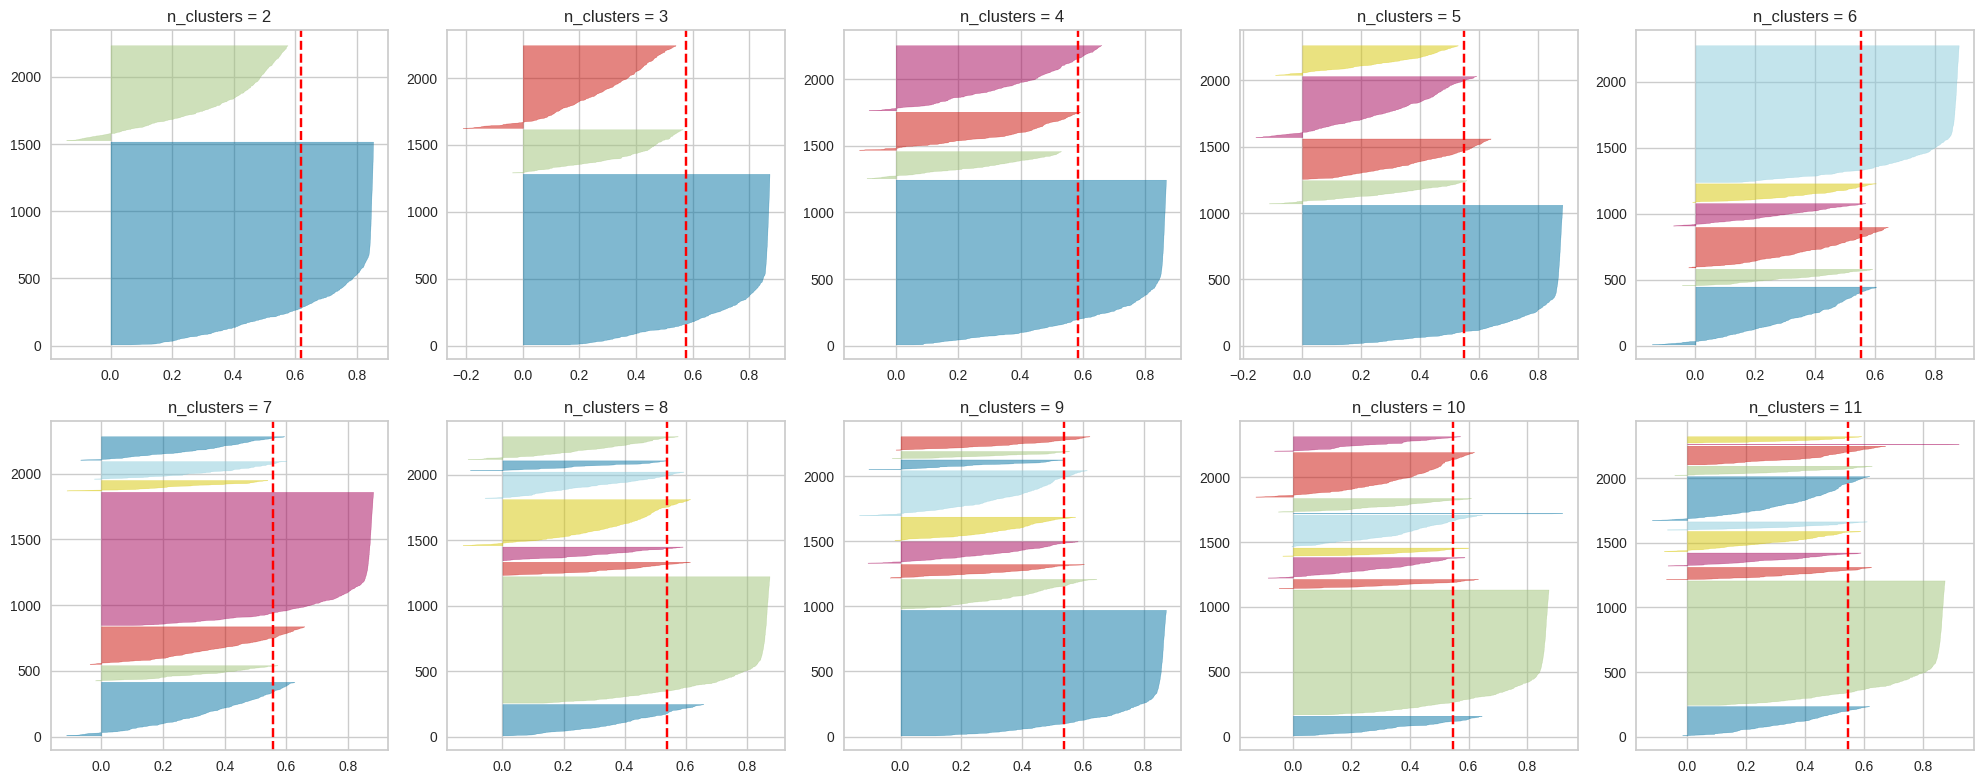

Optimal number of clusters (k) based on silhouette score: 2 the score : 0.6190882580348603


In [17]:
#This function iterates over different values of k, calculates silhouette scores, visualizes the results, and prints the optimal k based on the maximum silhouette score.

# Perform silhouette analysis for different values of k
n_clusters_list = list(range(2, 12))
silhouette_scores = []
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
axs = axs.ravel()

# Iterate over different values of k
for i, n_clusters in enumerate(n_clusters_list):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    # Visualize silhouette scores using Yellowbrick
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=axs[i])
    visualizer.fit(X)

    # Calculate and store the silhouette score
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    axs[i].set_title(f'n_clusters = {n_clusters}')

plt.tight_layout()
plt.show()

# Find the optimal k based on the maximum silhouette score
optimal_k = n_clusters_list[np.argmax(silhouette_scores)]
max_silhouette_score = np.max(silhouette_scores)
print(f'Optimal number of clusters (k) based on silhouette score: {optimal_k} the score : {max_silhouette_score}')

## 3. PCA (15 points)
In this exercise, you will implement PCA:
*   With n_components = 2 (5 points).
*   Visualize the PCA (5 points).
*   Find the variance explined in this PCA (5 points).





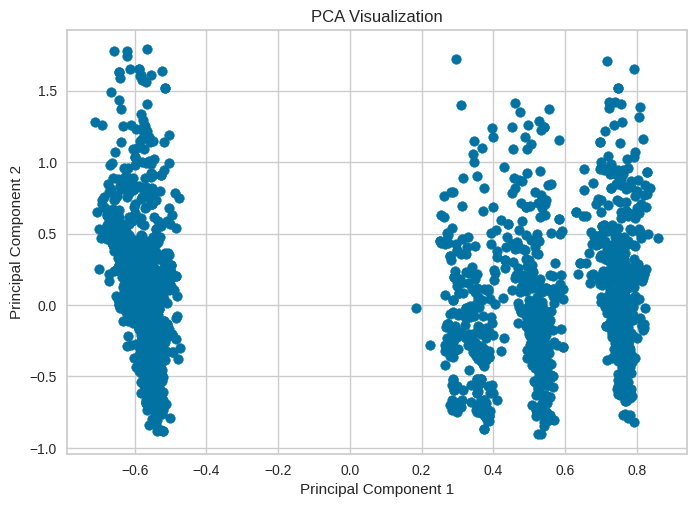

Explained Variance for Principal Component 1: 0.3461382526292937
Explained Variance for Principal Component 2: 0.25362314217011966


In [18]:
# Adjust n_components as needed
#This function applies PCA to the provided DataFrame with specified n_components, creates a new DataFrame with principal components, visualizes the results, and prints the explained variance for each principal component.

# Perform Principal Component Analysis (PCA) with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df2)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])

# Plotting the PCA
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'])
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Display explained variance
explained_variance = pca.explained_variance_
print(f'Explained Variance for Principal Component 1: {explained_variance[0]}')
print(f'Explained Variance for Principal Component 2: {explained_variance[1]}')



**Q**: What is the variance explained in the 2 component PCA?

**A**:

Explained Variance for Principal Component 1: 0.3461382526292928

Explained Variance for Principal Component 2: 0.2536231421709363


## 4. PCA & Kmeans (20 points)
This time, we will use the PCA data for the kmeans model.
*   Run PCA with n_components = 2 (5 points)
*   Find the best k for kmeans (5 points)
*   Plot the best clusters (5 points)
*   Answer the question (5 points)





In [19]:
#We did PCA in part 3
pca_x = pca_df.copy()

### Elbow

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

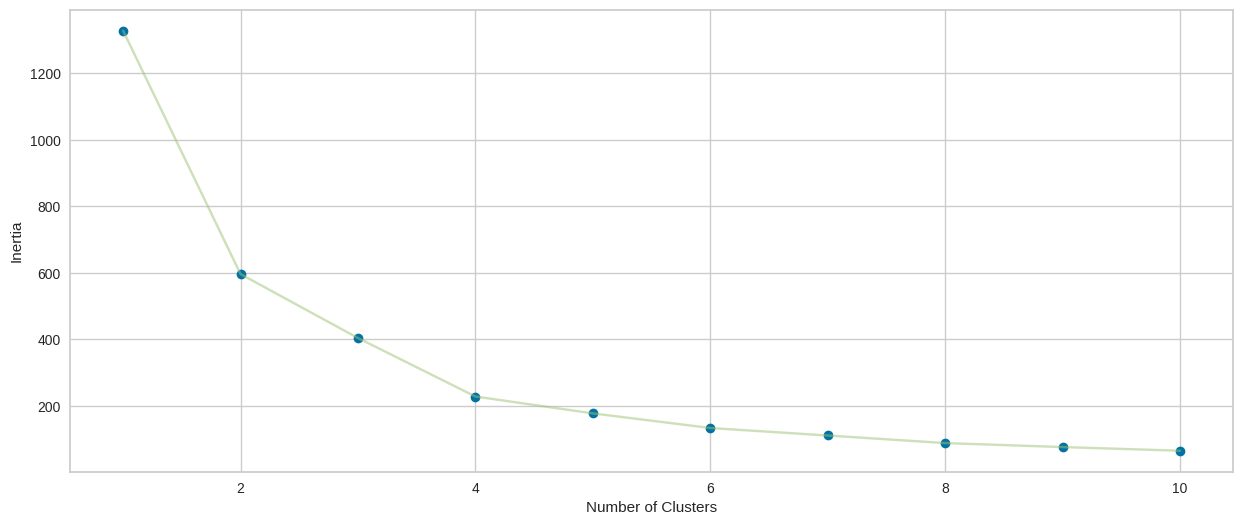

In [20]:
# This function calculates the inertia (within-cluster sum of squares) for different values of k after PCA, plots the results using the Elbow Method, and provides insights into the optimal number of clusters.

# Calculate and visualize the inertia for different values of k after PCA
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_x)
    inertia.append(kmeans.inertia_)

# Plot the inertia values for each number of clusters
plt.figure(1, figsize = (15,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()


### Silhouette

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to s

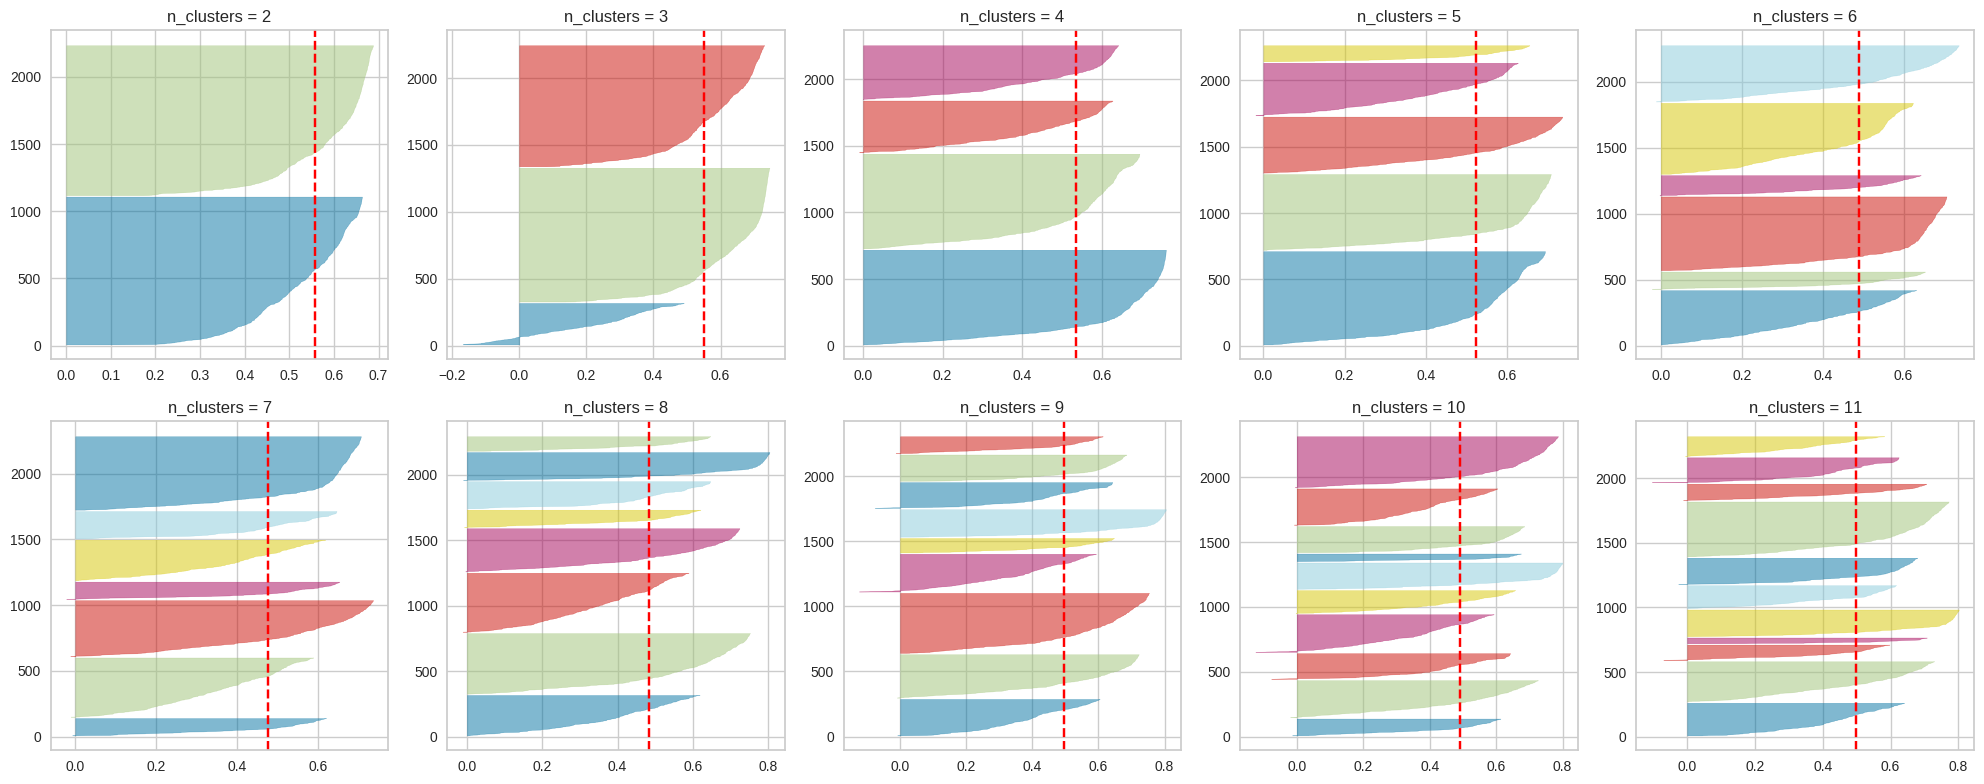

Optimal number of clusters (k) based on silhouette score: 2 the score : 0.5586013840807448


In [21]:
#This function iterates over different values of k after PCA, calculates silhouette scores, visualizes the results using Yellowbrick, and prints the optimal k based on the maximum silhouette score.

# Perform silhouette analysis for different values of k after PCA
n_clusters_list = list(range(2, 12))
silhouette_scores = []
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
axs = axs.ravel()

# Iterate over different values of k
for i, n_clusters in enumerate(n_clusters_list):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(pca_x)
    # Visualize silhouette scores using Yellowbrick
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=axs[i])
    visualizer.fit(pca_x)
    # Calculate and store the silhouette score
    silhouette_avg = silhouette_score(pca_x, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    axs[i].set_title(f'n_clusters = {n_clusters}')

plt.tight_layout()
plt.show()
# Find the optimal k based on the maximum silhouette score
optimal_k = n_clusters_list[np.argmax(silhouette_scores)]
max_silhouette_score = np.max(silhouette_scores)
print(f'Optimal number of clusters (k) based on silhouette score: {optimal_k} the score : {max_silhouette_score}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


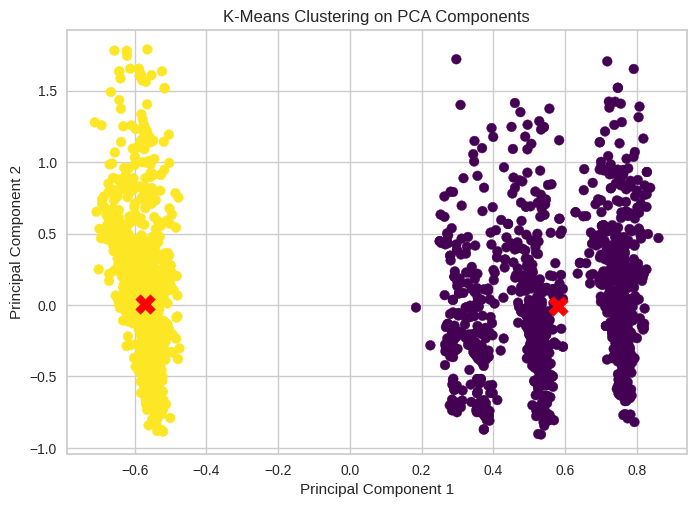

In [22]:
#This function applies k-Means clustering with a specified number of clusters (k) on PCA components and visualizes the resulting clusters along with cluster centroids.

# Perform k-Means clustering with specified number of clusters (k) on PCA components
k=2
kmeans = KMeans(n_clusters=k, random_state=42).fit(pca_x)
# Visualize the clusters
plt.scatter(pca_x['Principal Component 1'], pca_x['Principal Component 2'], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red')
plt.title('K-Means Clustering on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

**Q**: In our human eye, it's looks like we need 5 clusters. But both methods return 2. Why do you think kmeans returning 2 and not 5?

**A**:It could have happened because K-means is sensitive to the initial placement of centroids, and we chose the centroids randomly or based on a previous assumption. Additionally, K-means assumes that clusters are round. If the clusters have different shapes or variances, K-means might not perform optimally.

## 5. K-means Clustering Exercise (15 points)
Manually divide a given set of points into clusters using the K-means clustering.

You are given the following two-dimensional points: <br>
*   A:(2,2)
*   B:(2,6)
*   C:(3,7)
*   D:(5,5)
*   E:(6,2)
*   F:(7,4)
*   G:(8,7)

**Tasks:**
1.   **Visualize the Data**: Plot these points and label each point for easy identification (3 points).
2.   **Choose Initial Cluster Centers**: Arbitrarily select three points as initial cluster centers (For example, you might choose points A and D) and **Answer the questions** (12 points).











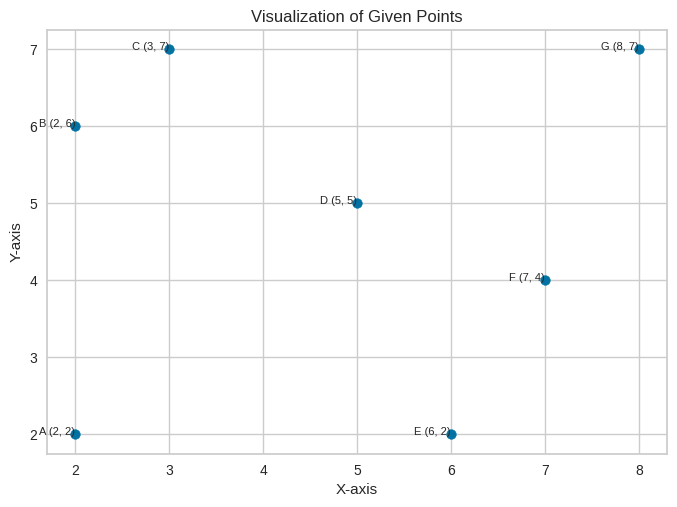

In [23]:
# Question 1
#This code visualizes the given points on a 2D plot, labeling each point with its coordinates, and adding axes labels and a title.

points = {'A': (2, 2), 'B': (2, 6), 'C': (3, 7), 'D': (5, 5), 'E': (6, 2), 'F': (7, 4), 'G': (8, 7)}

# Extracting x and y coordinates
x_coords, y_coords = zip(*points.values())

# Plotting the points
plt.scatter(x_coords, y_coords)

# Labeling each point
for point, coordinates in points.items():
    plt.text(coordinates[0], coordinates[1], f'{point} {coordinates}', fontsize=8, ha='right')

# Adding labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Visualization of Given Points')

# Display the plot
plt.show()



**Questions**:
1.   How did the points group together in the final iteration?
2.   Was choosing different initial cluster centers leading to different final clusters? Why might this happen?
3.   Think of any real-world scenarios where K-means clustering could be useful?






**Answers**:

1.We choose points C,E,G as initial cluster centers .

Cluster 1: centroid (8,7) point G

Cluster 2: centroid (3.33,6) , points: B,C,D!

Cluster 3: centroid (5,2.667) , points A,E,F

2.K-means seeks to minimize the sum of squared distances within clusters. However, depending on the initial cluster centers, the algorithm may get stuck in a local minimum. Different initializations can lead to different local minima, influencing the final clusters.
For example, if we were to choose F as the initial cluster center instead of G, we would get different final clusters.

3.Document Classification: Clustering can group similar documents together, aiding in document classification and retrieval.




## 6. Bonus - Compute projection (5 points)
**Notice:** No code required in this section.

Given the next PCA projection matrix
$\begin{pmatrix}
1 & 1\\
2 & -1
\end{pmatrix}$
And the correspoding egienvalues
$(5, -1)$

Compute the projection to one dimension of the next two vectors:
\begin{pmatrix}
1 & 3
\end{pmatrix}
\begin{pmatrix}
3 & 7
\end{pmatrix}

**A**
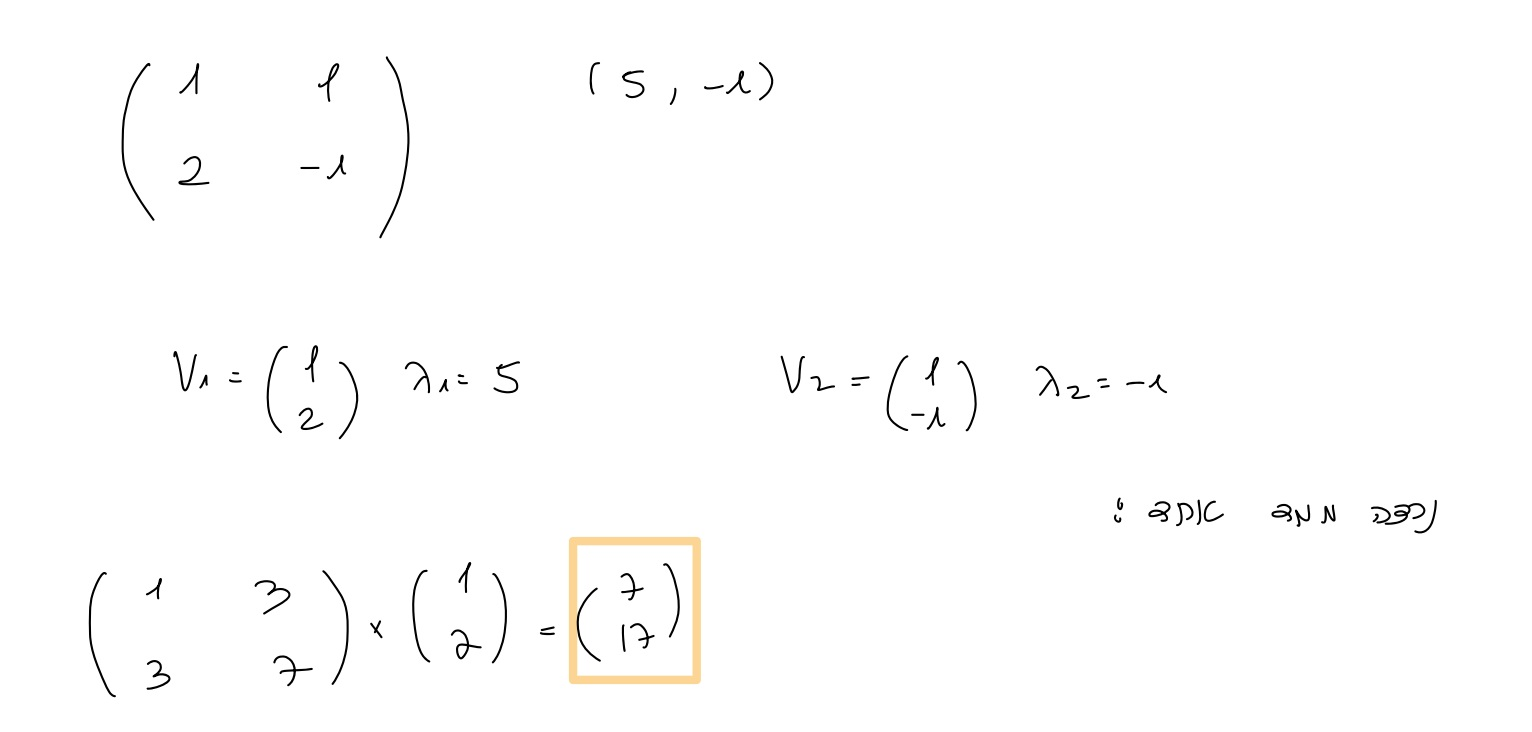